# MODIFICAÇÔES INICIAM

# Read Pre-train Model

In [1]:
import pandas as pd # data manipulation and analysis
it = pd.read_csv('intent_test.csv')
it_train = pd.read_csv('intent_train.csv')

In [2]:
it.head(20)

,menssage,label
0,My laptop screen is flickering,support
1,I'm interested in a new PC,sales
2,I want to acquire a new desktop,sales
3,"My PC is broken, so I'm looking for a new one",sales
4,"Do you sell a complete PC, with mouse, keyboar...",sales
5,My laptop battery is not charging,support
6,My brother needs a fast PC for graphic design ...,sales
7,Is there a best way to make the transition fro...,support
8,Hello! I am looking to purchase a computer.,sales
9,My laptop screen is flickering,support


In [3]:
it_train.head()

,label_sales,label_support
0,would like additional product,i need the correct part
1,- look for qualifi product,- can you help with this
2,- look for product,- call the custom support
3,- submit order purchase,- ask for your help
4,- i am purchase product,- wait for refund


# Treino e Teste

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer
import itertools

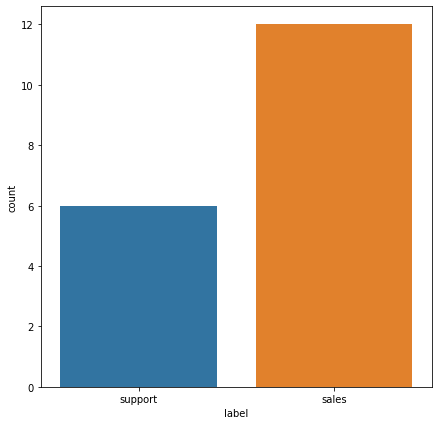

In [5]:
fig = plt.figure(figsize=(7, 7))  
sns.countplot(x='label', data=it);

<AxesSubplot:ylabel='label'>

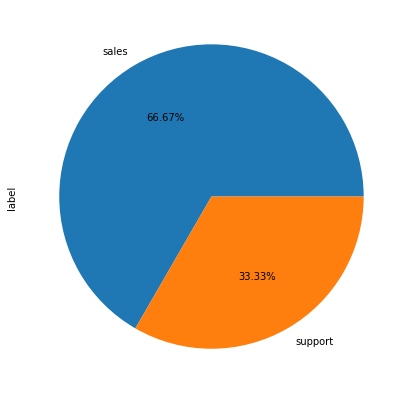

In [6]:
fig = plt.figure(figsize=(7, 7))   
it.label.value_counts().plot(kind='pie', autopct='%.2f%%')

In [14]:
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, make_scorer


def plot_LSB(test_data, test_labels, savepath="PCB_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red','blue']
        if plot:
            plt.scatter(lsa_scores[:,"sales"], lsa_scores[:,"support"], s=3, alpha=.3, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color = "red", label = "sales")
            blue_patch = mpatches.Patch(color = 'blue',label = 'support')
            plt.legend(handles=[red_patch, blue_patch], prop={'size': 20})

def plot_intent_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.winter): 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title, fontsize=30) 
    plt.colorbar() 
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, fontsize=20) 
    plt.yticks(tick_marks, classes, fontsize=20) 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color= "white" if cm[i, j] < thresh else "black", fontsize=30) 
    plt.tight_layout() 
    return plt


def confusionI(target, pred):
    cm = confusion_matrix(target, pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_intent_confusion_matrix(cm, classes=['sales','support'], normalize=False, title='Confusion matrix')
    plt.show()
    
    
# Calculate F1-Score
from sklearn.metrics import f1_score

def changeIntent(x):
    """"
    Receive a local string
    Return the label hot encoded
    """
    if x.lower() == 'sales':
        return 1
    if x.lower() == 'support':
        return 0
    

def intent_rotulation(it):
    label_count=[]
    for item in it.label:
        label_count.append(changeIntent(item))
    it.loc[:,'rotulation']=label_count
        
    

In [15]:
intent_rotulation(it)
print(it)



                                             menssage    label  rotulation
0                      My laptop screen is flickering  support           0
1                          I'm interested in a new PC    sales           1
2                     I want to acquire a new desktop    sales           1
3       My PC is broken, so I'm looking for a new one    sales           1
4   Do you sell a complete PC, with mouse, keyboar...    sales           1
5                   My laptop battery is not charging  support           0
6   My brother needs a fast PC for graphic design ...    sales           1
7   Is there a best way to make the transition fro...  support           0
8         Hello! I am looking to purchase a computer.    sales           1
9                      My laptop screen is flickering  support           0
10                         I'm interested in a new PC    sales           1
11                    I want to acquire a new desktop    sales           1
12      My PC is broken, 

In [16]:
#Gráfico de dispersão
#count = CountVectorizer(ngram_range = (1,3))
#xtrain_matrix = count.fit_transform(it.rotulation)
#ytrain_matrix = it.menssage
#fig = plt.figure(figsize=(8, 8))  
#plot_LSB(xtrain_matrix,ytrain_matrix)

In [17]:
XI = it['menssage']
yI = it['rotulation']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(XI, yI, stratify=yI, test_size=0.2, random_state=7)

In [19]:


print("--------X_train")
print(X_train)
print("--------y_train")
print(y_train)
print("--------X_test")
print(X_test)
print("--------y_test")
print(y_test)

--------X_train
0                        My laptop screen is flickering
5                     My laptop battery is not charging
16    Is there a best way to make the transition fro...
1                            I'm interested in a new PC
15    My brother needs a fast PC for graphic design ...
4     Do you sell a complete PC, with mouse, keyboar...
17          Hello! I am looking to purchase a computer.
9                        My laptop screen is flickering
2                       I want to acquire a new desktop
7     Is there a best way to make the transition fro...
3         My PC is broken, so I'm looking for a new one
6     My brother needs a fast PC for graphic design ...
8           Hello! I am looking to purchase a computer.
10                           I'm interested in a new PC
Name: menssage, dtype: object
--------y_train
0     0
5     0
16    0
1     1
15    1
4     1
17    1
9     0
2     1
7     0
3     1
6     1
8     1
10    1
Name: rotulation, dtype: int64
--------X_t

In [20]:
vectorizer = CountVectorizer(ngram_range = (1,3))
#vectorizer = TfidfVectorizer(min_df=10) resultado final piora
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Modelo: Máquinas de Vetores de Suporte - SVC

In [21]:
from sklearn.svm import SVC

In [22]:
param_grid = {'C':[10,100,1000],'gamma':[1,0.1,0.001,0.0001,0.00001], 'kernel':['linear','rbf']}
gridSVC = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
gridSVC.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, 

[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [23]:
gridSVC.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

# Validação

In [24]:
svc = SVC(C = 100 , gamma=0.001 , kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(metrics.classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         1
           1     1.0000    1.0000    1.0000         3

    accuracy                         1.0000         4
   macro avg     1.0000    1.0000    1.0000         4
weighted avg     1.0000    1.0000    1.0000         4



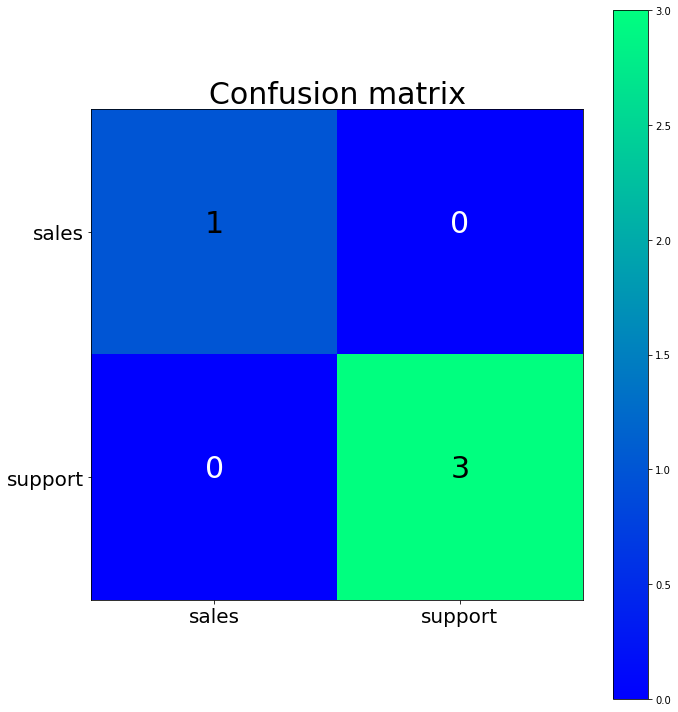

None


In [25]:
print(confusionI(y_test, y_pred))

# Modelo: Regressão Linear Logística

In [26]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train, y_train)

LogisticRegression(C=1)

# Validação

In [27]:
pred = model.predict(X_test)

In [28]:
print(metrics.classification_report(y_test,pred,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         1
           1     1.0000    1.0000    1.0000         3

    accuracy                         1.0000         4
   macro avg     1.0000    1.0000    1.0000         4
weighted avg     1.0000    1.0000    1.0000         4



In [29]:
grid={"C":np.logspace(0, 4, 10), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_cv= GridSearchCV(LogisticRegression() , grid , cv=10, scoring=make_scorer(f1_score, average='weighted'))
logreg_cv.fit(X_train,y_train)

ValueError: n_splits=10 cannot be greater than the number of members in each class.

In [202]:
# View best hyperparameters
print(logreg_cv.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Validação

In [73]:
model = LogisticRegression(penalty="l2", C= 7.742636826811269)
model.fit(X_train, y_train)

C:\Users\PICHAU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
pred = model.predict(X_test)

              precision    recall  f1-score   support

           0     0.8945    0.9550    0.9237       222
           1     0.6875    0.4681    0.5570        47

    accuracy                         0.8699       269
   macro avg     0.7910    0.7115    0.7404       269
weighted avg     0.8583    0.8699    0.8597       269



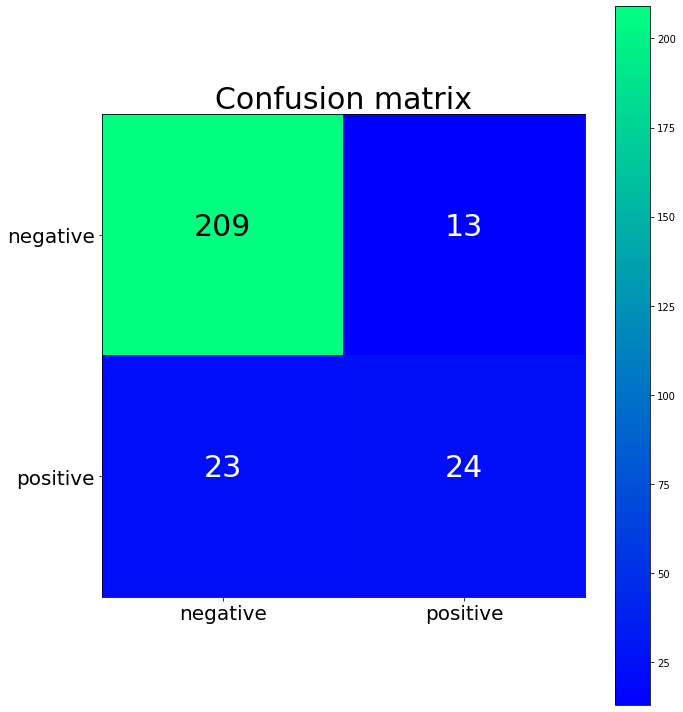

None


In [54]:
print(metrics.classification_report(y_test,pred,digits=4))
print(confusion(y_test, y_pred))

# Modelo: Multinomial Naive Bayes

In [55]:
gaussian = MultinomialNB()

In [56]:
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)

# Validação

              precision    recall  f1-score   support

           0     0.8315    1.0000    0.9080       222
           1     1.0000    0.0426    0.0816        47

    accuracy                         0.8327       269
   macro avg     0.9157    0.5213    0.4948       269
weighted avg     0.8609    0.8327    0.7636       269



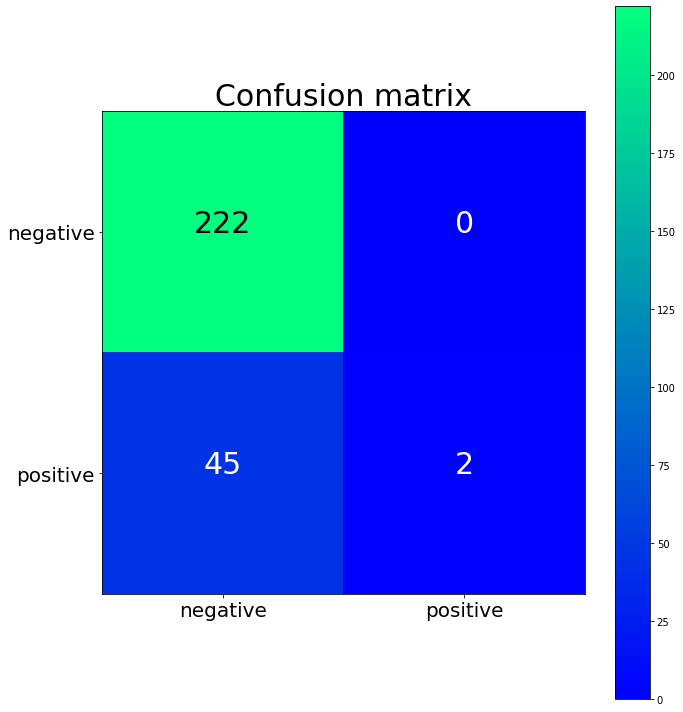

None


In [57]:
print(metrics.classification_report(y_test, y_pred,digits=4))
print(confusion(y_test, y_pred))

# Modelo: Árvore de Decisão

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
gridTree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10, scoring=make_scorer(f1_score, average='weighted'))
gridTree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,

In [60]:
# View best hyperparameters
print(gridTree.best_params_)

{'criterion': 'gini', 'max_depth': 15}


# Validação

In [61]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [62]:
print(metrics.classification_report(y_test, y_pred,digits=4))


              precision    recall  f1-score   support

           0     0.8903    0.9505    0.9194       222
           1     0.6562    0.4468    0.5316        47

    accuracy                         0.8625       269
   macro avg     0.7733    0.6986    0.7255       269
weighted avg     0.8494    0.8625    0.8516       269



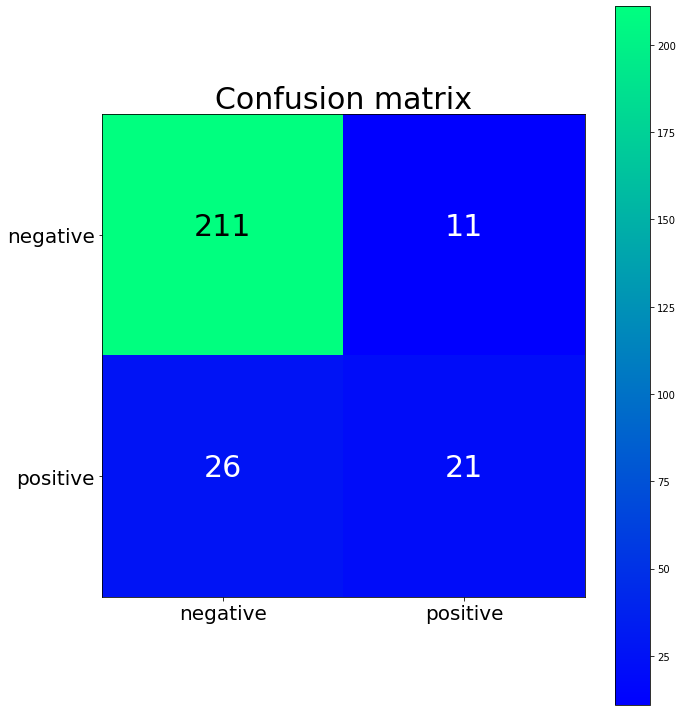

None


In [63]:
print(confusion(y_test, y_pred))

In [64]:
print('FIM')

FIM
